## 3번과 동일하지만 dense layer만 사용한 신경만으로 회귀를 수행하라.

In [20]:
import pandas as pd
df = pd.read_csv("./diabetes.csv")
df=df.drop('Outcome',axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [21]:
X = df.drop('BMI',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33


In [22]:
y = df['BMI']
y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

# 원 핫 인코딩

In [23]:
Y = pd.get_dummies(y).values

# Numpy 변환

In [24]:
X = X.values

In [25]:
X.shape

(768, 7)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [27]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(10,input_shape=(7,),activation='relu'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='mse',metrics=['mse'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                80        
                                                                 
 dense_17 (Dense)            (None, 8)                 88        
                                                                 
 dense_18 (Dense)            (None, 6)                 54        
                                                                 
 dense_19 (Dense)            (None, 1)                 7         
                                                                 
Total params: 229
Trainable params: 229
Non-trainable params: 0
_________________________________________________________________


In [28]:
import numpy as np

model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
20/20 [==============================] - 0s 6ms/step - loss: 0.1250 - mse: 0.1250 - val_loss: 0.0895 - val_mse: 0.0895
Epoch 2/30
20/20 [==============================] - 0s 2ms/step - loss: 0.0768 - mse: 0.0768 - val_loss: 0.0599 - val_mse: 0.0599
Epoch 3/30
20/20 [==============================] - 0s 2ms/step - loss: 0.0509 - mse: 0.0509 - val_loss: 0.0405 - val_mse: 0.0405
Epoch 4/30
20/20 [==============================] - 0s 2ms/step - loss: 0.0343 - mse: 0.0343 - val_loss: 0.0278 - val_mse: 0.0278
Epoch 5/30
20/20 [==============================] - 0s 2ms/step - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 6/30
20/20 [==============================] - 0s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 7/30
20/20 [==============================] - 0s 2ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 8/30
20/20 [==============================] - 0s 2ms/step - loss: 0.0096 - mse: 0.00

In [29]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
20/20 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.0040 - mse: 0.00

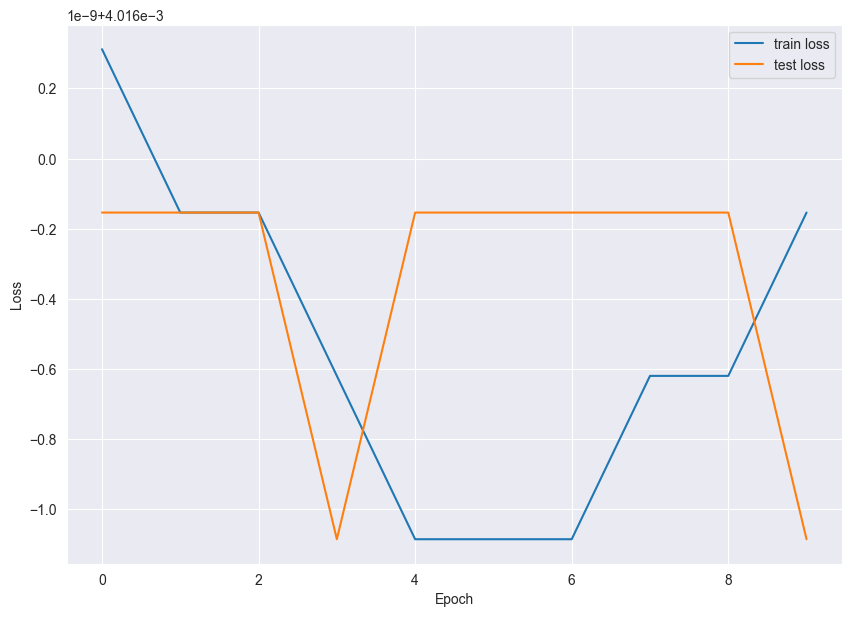

In [30]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 937us/step - loss: 0.0040 - mse: 0.0040


[0.004015998914837837, 0.004015998914837837]